In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random
from tensorflow.keras import models, Model
from tensorflow.keras.layers import LSTM, Input, GRU, SimpleRNN, Bidirectional, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [163]:
df = pd.read_csv('data-kiem-tra-2.csv', encoding='latin-1', sep=',')

In [164]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,07.11.2013,10,37,18474,199.0,1
550034,18.11.2013,10,37,18474,199.0,1
550035,24.11.2013,10,37,18484,199.0,1
550036,11.11.2013,10,37,19751,99.0,1


### Biến đổi cột 'date' từ type là object sang datetime

In [165]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [166]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,2013-05-10,4,58,3773,299.0,1
1,2013-05-26,4,58,3768,249.0,1
2,2013-05-19,4,58,4036,419.0,1
3,2013-05-25,4,58,12878,149.0,1
4,2013-05-15,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,2013-11-07,10,37,18474,199.0,1
550034,2013-11-18,10,37,18474,199.0,1
550035,2013-11-24,10,37,18484,199.0,1
550036,2013-11-11,10,37,19751,99.0,1


### Loại bỏ những giá trị bị lặp lại theo ngày

In [167]:
df = df.drop_duplicates(subset=['date'])

In [168]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,2013-05-10,4,58,3773,299.0,1
1,2013-05-26,4,58,3768,249.0,1
2,2013-05-19,4,58,4036,419.0,1
3,2013-05-25,4,58,12878,149.0,1
4,2013-05-15,4,58,12885,148.0,1
...,...,...,...,...,...,...
529140,2013-11-12,10,28,10298,399.0,2
529150,2013-11-28,10,28,10298,399.0,1
529163,2013-11-26,10,28,9324,589.0,1
529196,2013-11-19,10,28,8944,149.0,1


### Sort giá trị theo ngày

In [169]:
df = df.sort_values(by='date')
df.index = np.arange(1, len(df)+1)

In [170]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
1,2013-05-01,4,59,2436,799.0,1
2,2013-05-02,4,59,2739,2299.0,2
3,2013-05-03,4,59,2730,499.0,1
4,2013-05-04,4,59,2738,1839.0,1
5,2013-05-05,4,59,2257,299.0,1
...,...,...,...,...,...,...
210,2013-11-26,10,28,9324,589.0,1
211,2013-11-27,10,28,11030,149.0,1
212,2013-11-28,10,28,10298,399.0,1
213,2013-11-29,10,28,10292,99.0,1


### Dữ liệu sau khi đã xóa các trùng lặp về thời gian chỉ gồm 214 mẫu dữ liệu

### Biểu đồ heatmap thể hiện sự tương quan giữa các đặc trưng của dữ liệu

In [171]:
columns = ['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']

In [172]:
data = df[columns]

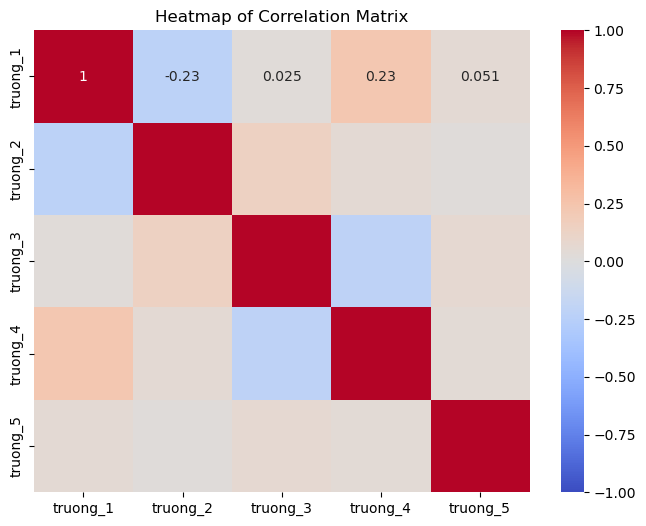

In [173]:
correlation_matrix = data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Biểu đồ thể hiện các giá trị của trường 1

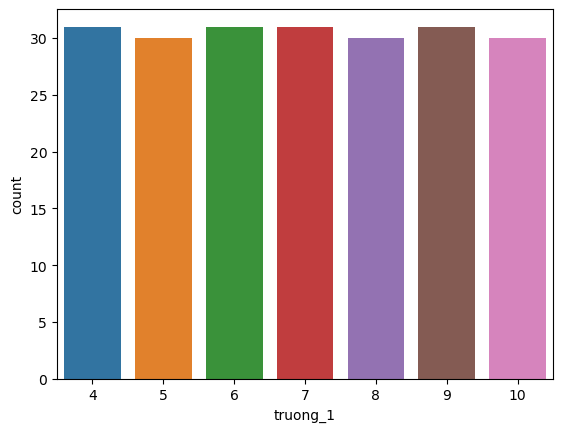

In [174]:
sns.countplot(data=data, x='truong_1');

### Biều đồ thể hiện các giá trị của trường 2 theo thời gian

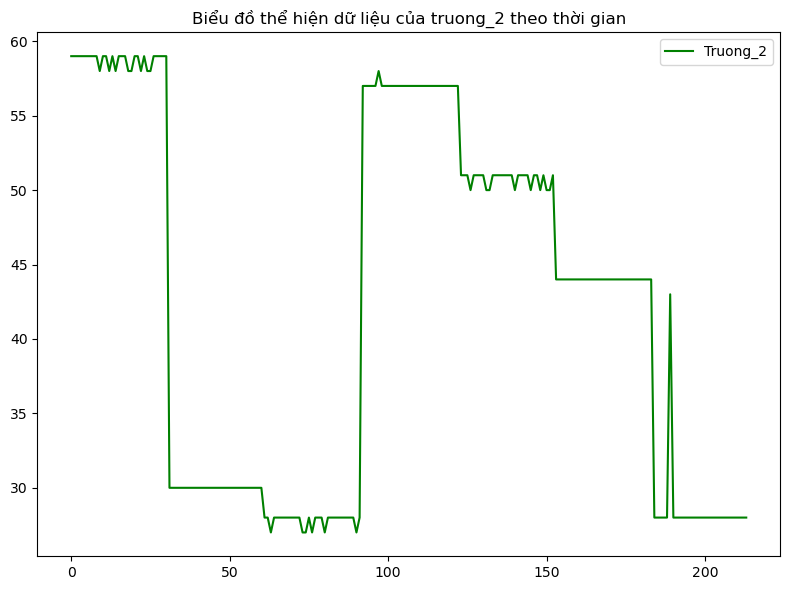

In [175]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_2'].shape[0]), data['truong_2'], 'green', label='Truong_2')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_2 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

### Biều đồ thể hiện các giá trị của trường 3 theo thời gian

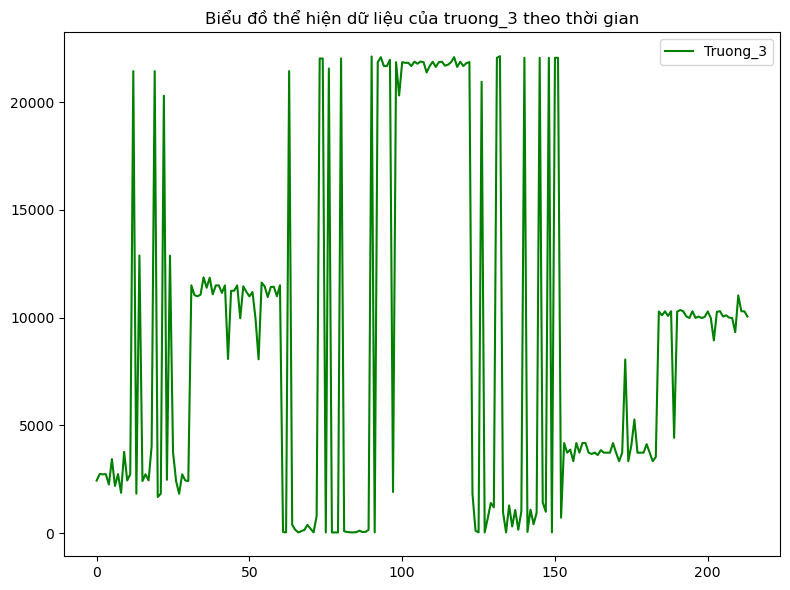

In [176]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_3'].shape[0]), data['truong_3'], 'green', label='Truong_3')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_3 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

### Biều đồ thể hiện các giá trị của trường 4 theo thời gian

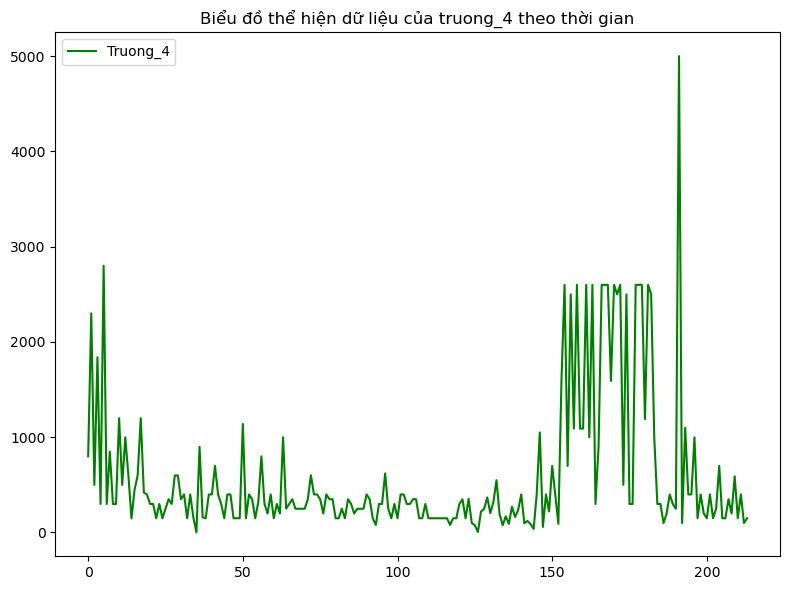

In [177]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_4'].shape[0]), data['truong_4'], 'green', label='Truong_4')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_4 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

### Biều đồ thể hiện các giá trị của trường 5 theo thời gian

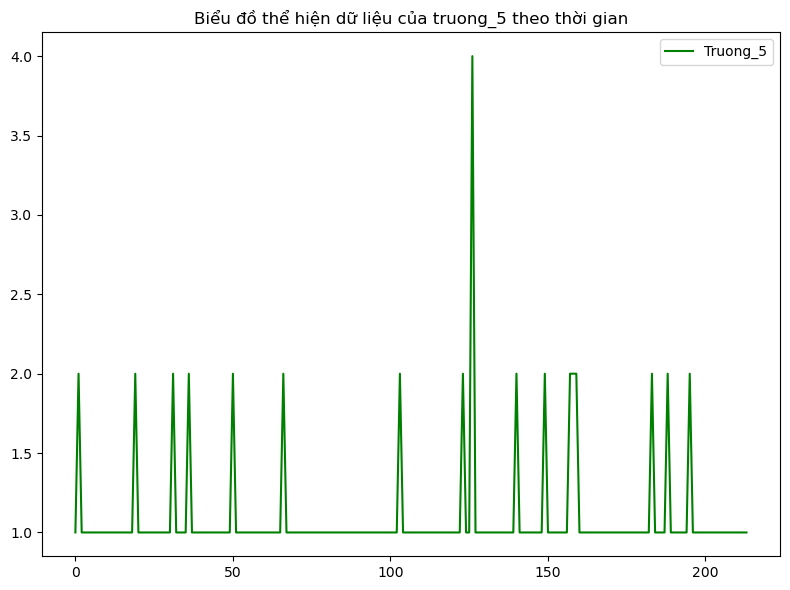

In [178]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_5'].shape[0]), data['truong_5'], 'green', label='Truong_5')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_5 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

## ARIMA và GARCH

In [179]:
# Sử dụng test size = 50
TEST_SIZE = 50

- Đánh giá mô hình qua 4 độ đo:
    - R2: Đánh giá mức độ tốt của mô hình hồi quy
    - RMSE: Đánh giá biên độ dao động giữa giá trị dự báo xung quanh giá trị thực tế
    - MAE: Trung bình sai số giữa giá trị dự báo và giá trị thực tế
    - MAPE: Phần trăm lỗi giữa giá trị dự đoán và giá trị thực tế

In [180]:
def measure_metric(y_true, y_pred):
    e = y_true - y_pred
    r2=r2_score(y_true, y_pred)
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print('R2: {}'.format(r2))
    print('MSE: {}'.format(mse))
    print('RMSE: {}'.format(rmse))
    print('MAE: {}'.format(mae))
    print('MAPE: {}'.format(mape))
    return [r2, mse, rmse, mae, mape]

In [181]:
dict_single_step = {
    'R2': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'MAPE': []
}

In [182]:
metric_df_single_step = pd.DataFrame(dict_single_step)

In [183]:
df['date'] = pd.to_datetime(df['date'])

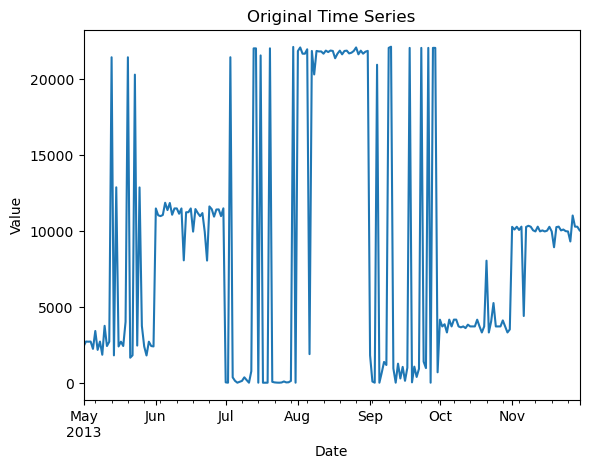

c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\AppData\Local\Temp\ipykernel_13944\1814181537.py:38: FutureWarning: Series.__getitem__ treating keys as positions is depreca

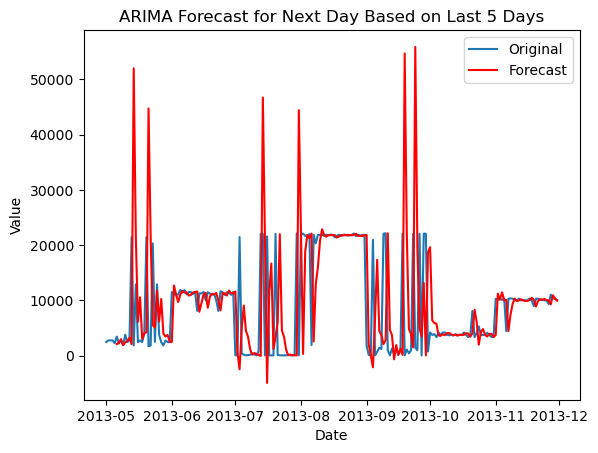

Dự báo cho ngày 2013-11-30 00:00:00 là: 9930.237693229687


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Đọc dữ liệu vào DataFrame từ tệp CSV
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Vẽ chuỗi thời gian ban đầu
df['truong_3'].plot()
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Chọn các giá trị p, d, q
p = 1  # Số lượng các quan sát trễ
d = 1  # Số lần lấy sai khác để làm tĩnh chuỗi thời gian
q = 1  # Số lượng sai số trễ

# Khởi tạo danh sách lưu trữ các dự báo
forecasts = []

# Lặp qua các khoảng thời gian trong chuỗi dữ liệu
for i in range(5, len(df)):
    # Sử dụng 5 ngày trước đó để dự báo ngày thứ 6
    train_data = df['truong_3'].iloc[i-5:i]
    
    # Tạo mô hình ARIMA
    model = ARIMA(train_data, order=(p, d, q))

    # Huấn luyện mô hình
    model_fit = model.fit()

    # Dự báo giá trị ngày tiếp theo
    forecast = model_fit.forecast(steps=1)
    forecasts.append(forecast[0])

# Vẽ dự báo so với dữ liệu thực tế
forecast_dates = df.index[5:]
plt.plot(df.index, df['truong_3'], label='Original')
plt.plot(forecast_dates, forecasts, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast for Next Day Based on Last 5 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# In dự báo cho ngày cuối cùng
print(f"Dự báo cho ngày {forecast_dates[-1]} là: {forecasts[-1]}")


Iteration:      1,   Func. Count:      6,   Neg. LLF: 33.78177449842695
Iteration:      2,   Func. Count:     12,   Neg. LLF: 33.516524183808365
Iteration:      3,   Func. Count:     17,   Neg. LLF: 33.51652160309196
Iteration:      4,   Func. Count:     21,   Neg. LLF: 33.51652160310451
Optimization terminated successfully    (Exit mode 0)
            Current function value: 33.51652160309196
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36.463778539612086
Iteration:      2,   Func. Count:     11,   Neg. LLF: 36.3643263121401
Iteration:      3,   Func. Count:     16,   Neg. LLF: 36.35211024810018
Iteration:      4,   Func. Count:     21,   Neg. LLF: 36.349007489880876
Iteration:      5,   Func. Count:     26,   Neg. LLF: 36.34775180183681
Iteration:      6,   Func. Count:     31,   Neg. LLF: 36.34768201737266
Iteration:      7,   Func. Count:     36,   Neg. LLF: 36.34764377804605

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.956e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.412e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37.86532696492512
Iteration:      2,   Func. Count:     12,   Neg. LLF: 37.53309146959623
Iteration:      3,   Func. Count:     17,   Neg. LLF: 37.53299254648448
Iteration:      4,   Func. Count:     21,   Neg. LLF: 37.53299254645301
Optimization terminated successfully    (Exit mode 0)
            Current function value: 37.53299254648448
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37.8147516667566
Iteration:      2,   Func. Count:     12,   Neg. LLF: 37.583088014917514
Iteration:      3,   Func. Count:     17,   Neg. LLF: 37.58308693148582
Iteration:      4,   Func. Count:     21,   Neg. LLF: 37.58308693152625
Optimization terminated successfully    (Exit mode 0)
            Current function value: 37.58308693148582
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.955e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.173e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.60489885472434
Iteration:      3,   Func. Count:     17,   Neg. LLF: 51.604897555718665
Iteration:      4,   Func. Count:     21,   Neg. LLF: 51.60489755572421
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.604897555718665
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.24319222437575
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.68440162483854
Iteration:      3,   Func. Count:     16,   Neg. LLF: 51.684401624859966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.68440162483854
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 51.938551683195726
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.87518320209612
Iterat

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.662e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.017e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 51.65847568428424
Iteration:      2,   Func. Count:     12,   Neg. LLF: 48.79412837331437
Iteration:      3,   Func. Count:     16,   Neg. LLF: 48.794128373264805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.79412837331437
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49.375839848260576
Iteration:      2,   Func. Count:     12,   Neg. LLF: 48.462978650519325
Iteration:      3,   Func. Count:     17,   Neg. LLF: 48.46280271167726
Iteration:      4,   Func. Count:     21,   Neg. LLF: 48.46280271169139
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.46280271167726
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 51.742675728995586
Iterat

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.628e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.531e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.26182286016599
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.69058078805418
Iteration:      3,   Func. Count:     16,   Neg. LLF: 51.690580788054234
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.69058078805418
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.116987426495
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.781907022576846
Iteration:      3,   Func. Count:     16,   Neg. LLF: 51.781907022590275
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.781907022576846
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.98369131742781
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.63618713039649
Iteratio

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.811e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.167e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.22001566367402
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.39549202940403
Iteration:      3,   Func. Count:     17,   Neg. LLF: 51.395477825963965
Iteration:      4,   Func. Count:     21,   Neg. LLF: 51.39547782595984
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.395477825963965
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50.647982375732624
Iteration:      2,   Func. Count:     12,   Neg. LLF: 48.72720367848186
Iteration:      3,   Func. Count:     16,   Neg. LLF: 48.72720367850735
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.72720367848186
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49.48703611908688
Iterati

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.724e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.702e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35.5780677948095
Iteration:      2,   Func. Count:     12,   Neg. LLF: 35.548442641757696
Iteration:      3,   Func. Count:     16,   Neg. LLF: 35.54844264176597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35.548442641757696
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48.21164640343467
Iteration:      2,   Func. Count:     12,   Neg. LLF: 48.021678242375835
Iteration:      3,   Func. Count:     17,   Neg. LLF: 48.02167714265054
Iteration:      4,   Func. Count:     21,   Neg. LLF: 48.02167714265557
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.02167714265054
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49.05845416554804
Iteratio

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.346e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.837e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 49.68054435771069
Iteration:      2,   Func. Count:     12,   Neg. LLF: 48.87267249417231
Iteration:      3,   Func. Count:     17,   Neg. LLF: 48.847854967717296
Iteration:      4,   Func. Count:     22,   Neg. LLF: 48.84722507161108
Iteration:      5,   Func. Count:     27,   Neg. LLF: 48.84710280158525
Iteration:      6,   Func. Count:     31,   Neg. LLF: 48.84710280332768
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.84710280158525
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48.66121262715987
Iteration:      2,   Func. Count:     12,   Neg. LLF: 47.74432712623953
Iteration:      3,   Func. Count:     17,   Neg. LLF: 47.74410905519224
Iteration:      4,   Func. Count:     21,   Neg. LLF: 47.74410905521016
Optimization terminated successfully    (Exit mode 0)
            Curren

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.223e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.156e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSc

Iteration:      1,   Func. Count:      6,   Neg. LLF: 36.46814373046945
Iteration:      2,   Func. Count:     12,   Neg. LLF: 36.4484954086257
Iteration:      3,   Func. Count:     16,   Neg. LLF: 36.44849540860199
Optimization terminated successfully    (Exit mode 0)
            Current function value: 36.4484954086257
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 35.764541921759694
Iteration:      2,   Func. Count:     12,   Neg. LLF: 35.57843470693999
Iteration:      3,   Func. Count:     16,   Neg. LLF: 35.578434706953125
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35.57843470693999
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34.66294889898208
Iteration:      2,   Func. Count:     11,   Neg. LLF: 34.66080053053
Iteration:   

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.877e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.148e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      1,   Func. Count:      6,   Neg. LLF: 36.0202065126538
Iteration:      2,   Func. Count:     12,   Neg. LLF: 35.179171338282856
Iteration:      3,   Func. Count:     17,   Neg. LLF: 35.13559302927298
Iteration:      4,   Func. Count:     22,   Neg. LLF: 35.121261392658795
Iteration:      5,   Func. Count:     27,   Neg. LLF: 35.10648117826155
Iteration:      6,   Func. Count:     32,   Neg. LLF: 35.10516601748023
Iteration:      7,   Func. Count:     37,   Neg. LLF: 35.105079222561926
Iteration:      8,   Func. Count:     42,   Neg. LLF: 35.105075134560934
Iteration:      9,   Func. Count:     47,   Neg. LLF: 35.10506297967082
Iteration:     10,   Func. Count:     52,   Neg. LLF: 35.1050337842317
Iteration:     11,   Func. Count:     57,   Neg. LLF: 35.104955315374376
Iteration:     12,   Func. Count:     62,   Neg. LLF: 35.10475765795342
Iteration:     13,   Func. Count:     67,   Neg. LLF: 35.10426028185927
Iteration:     14,   Func. Count:     72,   Neg. LLF: 35.1031

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.538e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.79e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39.28256881148972
Iteration:      2,   Func. Count:     12,   Neg. LLF: 38.73710686913383
Iteration:      3,   Func. Count:     17,   Neg. LLF: 38.73710475333793
Iteration:      4,   Func. Count:     21,   Neg. LLF: 38.737104753350096
Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.73710475333793
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39.00825047358991
Iteration:      2,   Func. Count:     12,   Neg. LLF: 38.75732237278493
Iteration:      3,   Func. Count:     16,   Neg. LLF: 38.75732237283022
Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.75732237278493
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41.5267862191001
Iteration:

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.726e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.434e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSc

Iteration:      1,   Func. Count:      6,   Neg. LLF: 43.352646138663914
Iteration:      2,   Func. Count:     12,   Neg. LLF: 43.052584493159486
Iteration:      3,   Func. Count:     16,   Neg. LLF: 43.05258449317779
Optimization terminated successfully    (Exit mode 0)
            Current function value: 43.052584493159486
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43.68235888342409
Iteration:      2,   Func. Count:     12,   Neg. LLF: 42.967766405767144
Iteration:      3,   Func. Count:     16,   Neg. LLF: 42.96776640573069
Optimization terminated successfully    (Exit mode 0)
            Current function value: 42.967766405767144
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 43.85472243882119
Iteration:      2,   Func. Count:     12,   Neg. LLF: 42.94220098722542
Itera

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.789e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.997e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSc

Iteration:      4,   Func. Count:     21,   Neg. LLF: 42.94200052707687
Optimization terminated successfully    (Exit mode 0)
            Current function value: 42.94200052705666
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34.725833173589514
Iteration:      2,   Func. Count:     12,   Neg. LLF: 34.132583121746364
Iteration:      3,   Func. Count:     16,   Neg. LLF: 34.132583121723926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.132583121746364
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34.21005695660482
Iteration:      2,   Func. Count:     12,   Neg. LLF: 34.20578838950719
Iteration:      3,   Func. Count:     16,   Neg. LLF: 34.20578838951592
Optimization terminated successfully    (Exit mode 0)
            Current func

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.252e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.255e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.600245311021
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.338526871106346
Iteration:      3,   Func. Count:     16,   Neg. LLF: 52.33852687113909
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.338526871106346
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54.93865320536586
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.31290102206653
Iteration:      3,   Func. Count:     16,   Neg. LLF: 52.31290102211126
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.31290102206653
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.10782930177348
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.19550421253734
Iteration:

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.451e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.451e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      3,   Func. Count:     16,   Neg. LLF: 53.39640963994365
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.3964096399758
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.78070994616011
Iteration:      2,   Func. Count:     12,   Neg. LLF: 53.47736552293286
Iteration:      3,   Func. Count:     17,   Neg. LLF: 53.47736478112799
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.47736478112799
            Iterations: 3
            Function evaluations: 17
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54.45956012189552
Iteration:      2,   Func. Count:     12,   Neg. LLF: 53.455771592473226
Iteration:      3,   Func. Count:     16,   Neg. LLF: 53.455771592420376
Optimization terminated successfully    (Exit mode 0)
            Current functio

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.145e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.137e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: Dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 22.791541541821815
Iteration:      2,   Func. Count:     12,   Neg. LLF: 21.924413387055168
Iteration:      3,   Func. Count:     17,   Neg. LLF: 21.924230715224454
Iteration:      4,   Func. Count:     22,   Neg. LLF: 21.92331516774477
Iteration:      5,   Func. Count:     27,   Neg. LLF: 21.92205444110701
Iteration:      6,   Func. Count:     32,   Neg. LLF: 21.920268011069126
Iteration:      7,   Func. Count:     37,   Neg. LLF: 21.919318943973696
Iteration:      8,   Func. Count:     42,   Neg. LLF: 21.9191245631907
Iteration:      9,   Func. Count:     47,   Neg. LLF: 21.91910883574618
Iteration:     10,   Func. Count:     52,   Neg. LLF: 21.91910723711691
Iteration:     11,   Func. Count:     57,   Neg. LLF: 21.91910329678331
Iteration:     12,   Func. Count:     62,   Neg. LLF: 21.919093254851774
Iteration:     13,   Func. Count:     67,   Neg. LLF: 21.91906655708498
Iteration:     14,   Func. Count:     72,   Neg. LLF: 21.91

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.764e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.778e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.2272083895024
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.31303262932492
Iteration:      3,   Func. Count:     17,   Neg. LLF: 52.312835633230186
Iteration:      4,   Func. Count:     21,   Neg. LLF: 52.31283563324044
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.312835633230186
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 32.613688054714906
Iteration:      2,   Func. Count:     12,   Neg. LLF: 32.509678320882855
Iteration:      3,   Func. Count:     16,   Neg. LLF: 32.5096783208969
Optimization terminated successfully    (Exit mode 0)
            Current function value: 32.509678320882855
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.07521644206378
Iterati

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.326e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.145e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28.927267113914084
Iteration:      2,   Func. Count:     12,   Neg. LLF: 28.370020994138006
Iteration:      3,   Func. Count:     17,   Neg. LLF: 28.370019298163626
Iteration:      4,   Func. Count:     22,   Neg. LLF: 28.37001797081872
Iteration:      5,   Func. Count:     27,   Neg. LLF: 28.370009613703857
Iteration:      6,   Func. Count:     32,   Neg. LLF: 28.369990597045774
Iteration:      7,   Func. Count:     37,   Neg. LLF: 28.369947276356232
Iteration:      8,   Func. Count:     42,   Neg. LLF: 28.369855403459415
Iteration:      9,   Func. Count:     47,   Neg. LLF: 28.36971558015184
Iteration:     10,   Func. Count:     52,   Neg. LLF: 28.36959310949731
Iteration:     11,   Func. Count:     57,   Neg. LLF: 28.369549681424452
Iteration:     12,   Func. Count:     62,   Neg. LLF: 28.3695449793757
Iteration:     13,   Func. Count:     66,   Neg. LLF: 28.369544979367866
Optimization terminated successfully    (Exit mode 0)
  

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.723e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.375e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33.48479915097518
Iteration:      2,   Func. Count:     12,   Neg. LLF: 33.29512641337933
Iteration:      3,   Func. Count:     17,   Neg. LLF: 33.29512333225994
Iteration:      4,   Func. Count:     22,   Neg. LLF: 33.29512087638771
Iteration:      5,   Func. Count:     27,   Neg. LLF: 33.29511209022448
Iteration:      6,   Func. Count:     32,   Neg. LLF: 33.29509155680739
Iteration:      7,   Func. Count:     37,   Neg. LLF: 33.29503538698259
Iteration:      8,   Func. Count:     42,   Neg. LLF: 33.29489480410579
Iteration:      9,   Func. Count:     47,   Neg. LLF: 33.29454116268877
Iteration:     10,   Func. Count:     52,   Neg. LLF: 33.2937282319059
Iteration:     11,   Func. Count:     57,   Neg. LLF: 33.292185277684624
Iteration:     12,   Func. Count:     62,   Neg. LLF: 33.29018097222031
Iteration:     13,   Func. Count:     67,   Neg. LLF: 33.28884304178516
Iteration:     14,   Func. Count:     72,   Neg. LLF: 33.2885545

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.124e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.052e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      3,   Func. Count:     16,   Neg. LLF: 30.41202700364034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.4120270036697
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 30.6256239829292
Iteration:      2,   Func. Count:     12,   Neg. LLF: 30.243292423024922
Iteration:      3,   Func. Count:     16,   Neg. LLF: 30.2432924229907
Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.243292423024922
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 30.531761351846832
Iteration:      2,   Func. Count:     12,   Neg. LLF: 29.71326326990551
Iteration:      3,   Func. Count:     17,   Neg. LLF: 29.69186043207768
Iteration:      4,   Func. Count:     22,   Neg. LLF: 29.68957147991339
Iteration:

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.596e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.576e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      3,   Func. Count:     17,   Neg. LLF: 53.32929240373503
Iteration:      4,   Func. Count:     22,   Neg. LLF: 53.32894926816795
Iteration:      5,   Func. Count:     27,   Neg. LLF: 53.32872863878544
Iteration:      6,   Func. Count:     32,   Neg. LLF: 53.328296326213454
Iteration:      7,   Func. Count:     37,   Neg. LLF: 53.32830025147281
Iteration:      8,   Func. Count:     42,   Neg. LLF: 53.328282628399535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.32828262839561
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.285106001603666
Iteration:      2,   Func. Count:     12,   Neg. LLF: 53.237935262631346
Iteration:      3,   Func. Count:     16,   Neg. LLF: 53.237935262604424
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.237935262631346
            Iterations: 3
     

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.038e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.737e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: Data

Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.20867282080753
Iteration:      3,   Func. Count:     16,   Neg. LLF: 52.20867282083982
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.20867282080753
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54.96536964927005
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.10437944472055
Iteration:      3,   Func. Count:     16,   Neg. LLF: 52.10437944471852
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.10437944472055
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.8364883998879
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.9190505198699
Iteration:      3,   Func. Count:     17,   Neg. LLF: 51.918836441876245
Iteration: 

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.5e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.234e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.41758293841404
Iteration:      2,   Func. Count:     12,   Neg. LLF: 53.269654983550076
Iteration:      3,   Func. Count:     17,   Neg. LLF: 53.260985134990406
Iteration:      4,   Func. Count:     22,   Neg. LLF: 53.25644457040189
Iteration:      5,   Func. Count:     27,   Neg. LLF: 53.25495460590031
Iteration:      6,   Func. Count:     32,   Neg. LLF: 53.25474799996164
Iteration:      7,   Func. Count:     37,   Neg. LLF: 53.254746893604874
Iteration:      8,   Func. Count:     41,   Neg. LLF: 53.25474689424385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.254746893604874
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.434529426893235
Iteration:      2,   Func. Count:     12,   Neg. LLF: 53.26288624014279
Iteration:      3,   Func. Count:     17,   Neg. LLF: 53.26288407775

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.097e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.094e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: Dat

Iteration:      5,   Func. Count:     27,   Neg. LLF: 53.34071229947653
Iteration:      6,   Func. Count:     32,   Neg. LLF: 53.34069987100003
Iteration:      7,   Func. Count:     36,   Neg. LLF: 53.340699871004944
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.34069987100003
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.16286264508737
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.25125333141475
Iteration:      3,   Func. Count:     17,   Neg. LLF: 52.251067523376136
Iteration:      4,   Func. Count:     21,   Neg. LLF: 52.25106752338283
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.251067523376136
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37.9595243899131
Iteratio

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.289e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.579e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      2,   Func. Count:     12,   Neg. LLF: 38.23376273399107
Iteration:      3,   Func. Count:     16,   Neg. LLF: 38.23376273394837
Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.23376273399107
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37.99226858919921
Iteration:      2,   Func. Count:     12,   Neg. LLF: 37.6216566407765
Iteration:      3,   Func. Count:     16,   Neg. LLF: 37.6216566407423
Optimization terminated successfully    (Exit mode 0)
            Current function value: 37.6216566407765
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.43978828509028
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.2574795708618
Iteration:      3,   Func. Count:     17,   Neg. LLF: 52.25747827488305
Iteration:    

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.402e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.4e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.851494481779035
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.26907931093128
Iteration:      3,   Func. Count:     16,   Neg. LLF: 52.269079310936135
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.26907931093128
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.533976251495844
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.30233335037775
Iteration:      3,   Func. Count:     16,   Neg. LLF: 52.3023333504122
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.30233335037775
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.39811673493908
Iteration:      2,   Func. Count:     12,   Neg. LLF: 53.272909837950266
Iterati

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.115e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.129e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: Dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 53.642943985459475
Iteration:      2,   Func. Count:     12,   Neg. LLF: 52.81694871557529
Iteration:      3,   Func. Count:     17,   Neg. LLF: 52.7862317423572
Iteration:      4,   Func. Count:     22,   Neg. LLF: 52.78550240928163
Iteration:      5,   Func. Count:     27,   Neg. LLF: 52.78536472657453
Iteration:      6,   Func. Count:     31,   Neg. LLF: 52.785364729131594
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.78536472657453
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52.59102020541839
Iteration:      2,   Func. Count:     12,   Neg. LLF: 51.657924577814946
Iteration:      3,   Func. Count:     17,   Neg. LLF: 51.582274742005794
Iteration:      4,   Func. Count:     22,   Neg. LLF: 51.57104131414564
Iteration:      5,   Func. Count:     27,   Neg. LLF: 51.5291932753723

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.576e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.908e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSc

Iteration:      1,   Func. Count:      6,   Neg. LLF: 43.53782202720942
Iteration:      2,   Func. Count:     12,   Neg. LLF: 42.64573063635175
Iteration:      3,   Func. Count:     17,   Neg. LLF: 42.64104993833746
Iteration:      4,   Func. Count:     22,   Neg. LLF: 42.53618890717013
Iteration:      5,   Func. Count:     27,   Neg. LLF: 42.52926461504373
Iteration:      6,   Func. Count:     32,   Neg. LLF: 42.518927280202234
Iteration:      7,   Func. Count:     37,   Neg. LLF: 42.5184765548627
Iteration:      8,   Func. Count:     42,   Neg. LLF: 42.51846099366733
Iteration:      9,   Func. Count:     46,   Neg. LLF: 42.518461008850565
Optimization terminated successfully    (Exit mode 0)
            Current function value: 42.51846099366733
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 35.98850270332224
Iteration:      2,   Func. Count:     12,   Neg. LLF: 35.84598142923384


c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.936e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.16e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScal

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35.90230976446711
Iteration:      2,   Func. Count:     12,   Neg. LLF: 35.860480300083466
Iteration:      3,   Func. Count:     16,   Neg. LLF: 35.86048030007463
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35.860480300083466
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37.015107354336706
Iteration:      2,   Func. Count:     12,   Neg. LLF: 36.182440321262625
Iteration:      3,   Func. Count:     17,   Neg. LLF: 36.182420930459266
Iteration:      4,   Func. Count:     21,   Neg. LLF: 36.182420930454455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 36.182420930459266
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34.18254122987757
Ite

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.008e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:     26,   Neg. LLF: 28.737575833290684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 28.73757583330016
            Iterations: 5
            Function evaluations: 26
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 28.46628055155936
Iteration:      2,   Func. Count:     11,   Neg. LLF: 28.464932992735278
Iteration:      3,   Func. Count:     16,   Neg. LLF: 28.46492890168848
Iteration:      4,   Func. Count:     20,   Neg. LLF: 28.46492890168821
Optimization terminated successfully    (Exit mode 0)
            Current function value: 28.46492890168848
            Iterations: 4
            Function evaluations: 20
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 29.23153824916912
Iteration:      2,   Func. Count:     12,   Neg. LLF: 27.81723448196498
Iteration:      3,   Func. Count:     17,   Neg. LLF: 27.77123734850995
Iteratio

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.958e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.154e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:     11,   Func. Count:     57,   Neg. LLF: 32.698836641873186
Iteration:     12,   Func. Count:     62,   Neg. LLF: 32.697891370182724
Iteration:     13,   Func. Count:     67,   Neg. LLF: 32.69738011423812
Iteration:     14,   Func. Count:     72,   Neg. LLF: 32.697297026501474
Iteration:     15,   Func. Count:     77,   Neg. LLF: 32.69729288133288
Iteration:     16,   Func. Count:     81,   Neg. LLF: 32.69729288133429
Optimization terminated successfully    (Exit mode 0)
            Current function value: 32.69729288133288
            Iterations: 16
            Function evaluations: 81
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 33.53748825793251
Iteration:      2,   Func. Count:     12,   Neg. LLF: 32.95970814161129
Iteration:      3,   Func. Count:     16,   Neg. LLF: 32.959708141619444
Optimization terminated successfully    (Exit mode 0)
            Current function value: 32.95970814161129
            Iterations: 3
     

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.103e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.047e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSc

Iteration:      3,   Func. Count:     17,   Neg. LLF: 44.28208716719796
Iteration:      4,   Func. Count:     21,   Neg. LLF: 44.28208716720502
Optimization terminated successfully    (Exit mode 0)
            Current function value: 44.28208716719796
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 45.15141315624317
Iteration:      2,   Func. Count:     12,   Neg. LLF: 44.5853229475655
Iteration:      3,   Func. Count:     16,   Neg. LLF: 44.58532294756998
Optimization terminated successfully    (Exit mode 0)
            Current function value: 44.5853229475655
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44.728125939602116
Iteration:      2,   Func. Count:     12,   Neg. LLF: 44.561787214764834
Iteration:      3,   Func. Count:     16,   Neg. LLF: 44.56178721478815
Optimizati

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.555e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.551e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      3,   Func. Count:     17,   Neg. LLF: 34.63489430572652
Iteration:      4,   Func. Count:     21,   Neg. LLF: 34.634894305728935
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.63489430572652
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34.95204018476313
Iteration:      2,   Func. Count:     11,   Neg. LLF: 34.95029125771546
Iteration:      3,   Func. Count:     15,   Neg. LLF: 34.950291257662464
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.95029125771546
            Iterations: 3
            Function evaluations: 15
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46.54484269640458
Iteration:      2,   Func. Count:     12,   Neg. LLF: 46.37485805693648
Iteration:      3,   Func. Count:     17,   Neg. LLF: 46.37485581964126
Iteratio

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.108e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.097e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      2,   Func. Count:     12,   Neg. LLF: 45.69615245199331
Iteration:      3,   Func. Count:     17,   Neg. LLF: 45.696150812580534
Iteration:      4,   Func. Count:     21,   Neg. LLF: 45.69615081258664
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.696150812580534
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46.40291436652464
Iteration:      2,   Func. Count:     12,   Neg. LLF: 45.82606595411924
Iteration:      3,   Func. Count:     16,   Neg. LLF: 45.82606595413233
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.82606595411924
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46.186790439120635
Iteration:      2,   Func. Count:     12,   Neg. LLF: 45.86692308451162
Iterati

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.481e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.367e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataSca

Iteration:      2,   Func. Count:     12,   Neg. LLF: 30.622044775317022
Iteration:      3,   Func. Count:     17,   Neg. LLF: 30.62203945737447
Iteration:      4,   Func. Count:     22,   Neg. LLF: 30.62202190986208
Iteration:      5,   Func. Count:     27,   Neg. LLF: 30.621984287301494
Iteration:      6,   Func. Count:     32,   Neg. LLF: 30.621878920759542
Iteration:      7,   Func. Count:     37,   Neg. LLF: 30.621620820882406
Iteration:      8,   Func. Count:     42,   Neg. LLF: 30.620997921216052
Iteration:      9,   Func. Count:     47,   Neg. LLF: 30.619708899243143
Iteration:     10,   Func. Count:     52,   Neg. LLF: 30.617729644860415
Iteration:     11,   Func. Count:     57,   Neg. LLF: 30.6159615624491
Iteration:     12,   Func. Count:     62,   Neg. LLF: 30.615352012564152
Iteration:     13,   Func. Count:     67,   Neg. LLF: 30.615295165956702
Iteration:     14,   Func. Count:     72,   Neg. LLF: 30.615292981208285
Iteration:     15,   Func. Count:     76,   Neg. LLF: 3

c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.303e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.98e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScal

Iteration:      3,   Func. Count:     17,   Neg. LLF: 35.312528244315914
Iteration:      4,   Func. Count:     22,   Neg. LLF: 35.31252682882046
Iteration:      5,   Func. Count:     27,   Neg. LLF: 35.31252188754882
Iteration:      6,   Func. Count:     32,   Neg. LLF: 35.3125101486808
Iteration:      7,   Func. Count:     37,   Neg. LLF: 35.31247860274172
Iteration:      8,   Func. Count:     42,   Neg. LLF: 35.312397022135535
Iteration:      9,   Func. Count:     47,   Neg. LLF: 35.31218860025908
Iteration:     10,   Func. Count:     52,   Neg. LLF: 35.31167654266899
Iteration:     11,   Func. Count:     57,   Neg. LLF: 35.310538072391395
Iteration:     12,   Func. Count:     62,   Neg. LLF: 35.30849609214389
Iteration:     13,   Func. Count:     67,   Neg. LLF: 35.30612033884423
Iteration:     14,   Func. Count:     72,   Neg. LLF: 35.304842488194986
Iteration:     15,   Func. Count:     77,   Neg. LLF: 35.30463733517538
Iteration:     16,   Func. Count:     82,   Neg. LLF: 35.3046

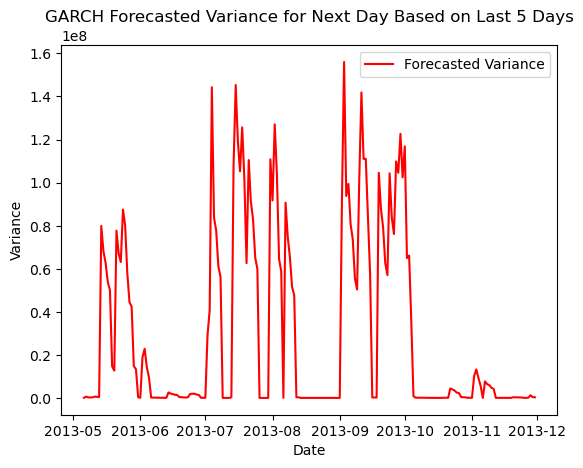

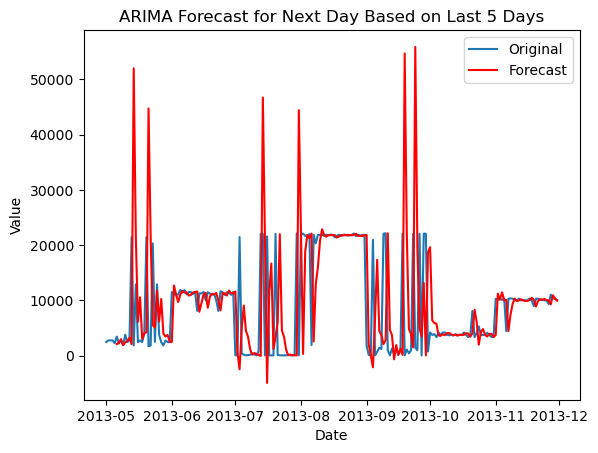

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model


# Chọn cột dữ liệu và chuyển đổi sang kiểu dữ liệu phù hợp
returns = df['truong_3'].astype(float)

# Chọn các giá trị p, q cho mô hình GARCH
p = 1  # Số lượng lags cho phần GARCH
q = 1  # Số lượng lags cho phần ARCH

# Khởi tạo danh sách lưu trữ các dự báo phương sai
forecast_variances = []

# Lặp qua các khoảng thời gian trong chuỗi dữ liệu
for i in range(5, len(df)):
    # Sử dụng 5 ngày trước đó để huấn luyện mô hình GARCH
    train_data = returns.iloc[i-5:i]
    
    # Xác định mô hình GARCH
    model = arch_model(train_data, vol='Garch', p=p, q=q)
    
    # Huấn luyện mô hình
    model_fit = model.fit()
    
    # Dự đoán phương sai cho ngày thứ 6
    forecast_variance = model_fit.forecast(horizon=1).variance.iloc[-1, -1]
    forecast_variances.append(forecast_variance)

# Hiển thị kết quả dự đoán trên biểu đồ
forecast_dates = df.index[5:]
plt.plot(forecast_dates, forecast_variances, label='Forecasted Variance', color='red')
plt.title('GARCH Forecasted Variance for Next Day Based on Last 5 Days')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()
plt.show()

forecast_dates = df.index[5:]
plt.plot(df.index, df['truong_3'], label='Original')
plt.plot(forecast_dates, forecasts, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast for Next Day Based on Last 5 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()